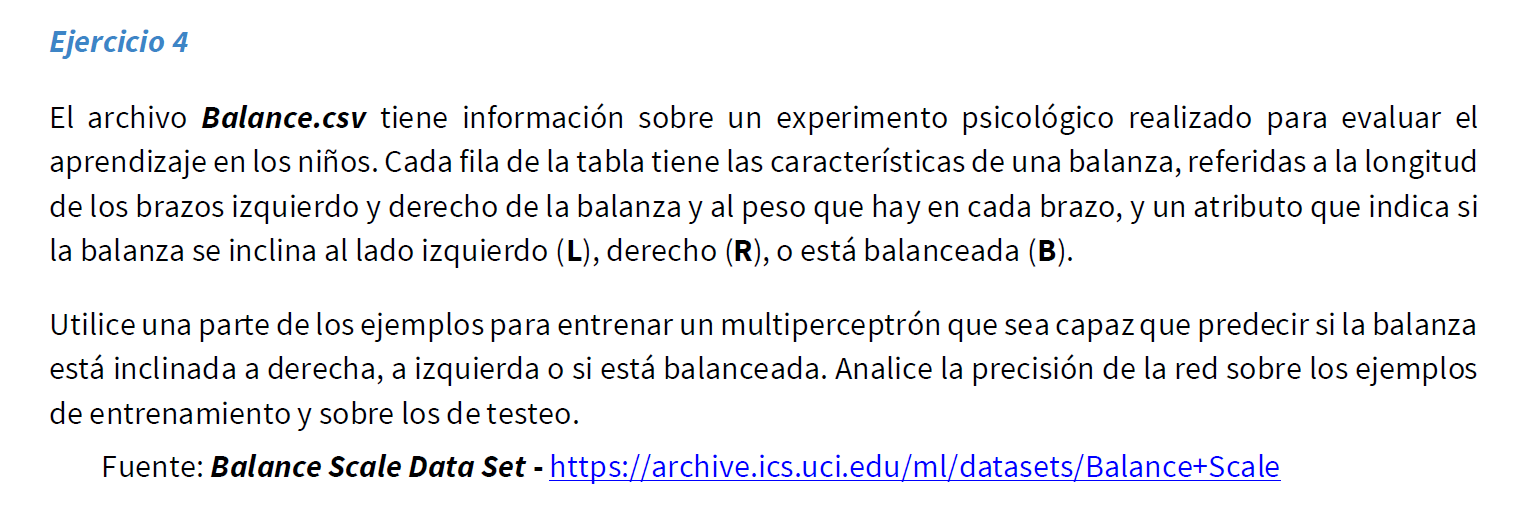

In [12]:
nombre_archivo = 'C:\\Users\\Usuario\\Documents\\GitHub\\Deep-Learning\\Datos-Fuentes\\Datos\\Balance.csv'

In [13]:
import os

##nombre_archivo = './Datos-Fuentes/Datos/Vinos.csv'

# Verifica si el archivo existe
if os.path.exists(nombre_archivo):
    print(f"El archivo {nombre_archivo} existe.")
else:
    print(f"El archivo {nombre_archivo} no se encuentra en la ruta especificada.")


El archivo C:\Users\Usuario\Documents\GitHub\Deep-Learning\Datos-Fuentes\Datos\Balance.csv existe.


   Balance  LeftWeight  LeftDist  RightWeight  RightDist
0        B           1         1            1          1
1        R           1         1            1          2
2        R           1         1            1          3
3        R           1         1            1          4
4        R           1         1            1          5
5        R           1         1            2          1
6        R           1         1            2          2
7        R           1         1            2          3
8        R           1         1            2          4
9        R           1         1            2          5
10       R           1         1            3          1
11       R           1         1            3          2
Index(['Balance', 'LeftWeight', 'LeftDist', 'RightWeight', 'RightDist'], dtype='object')
object


<Axes: >

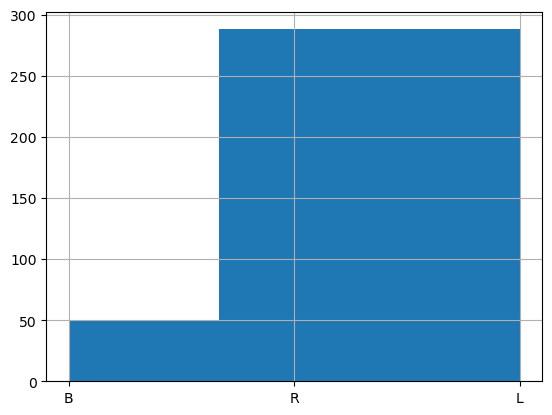

In [33]:
import chardet
import pandas as pd

# Detectar la codificación de caracteres usada
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())

# Leer el archivo CSV correctamente usando el delimitador apropiado (probablemente una coma ",")
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=",")

# Ver las primeras 12 filas para verificar que se haya leído correctamente
print(df.head(12))
print(df.columns)  # Verifica los nombres de las columnas

# Ahora verifica el tipo de datos de la columna 'Balance'
print(df['Balance'].dtype)

# Finalmente, grafica el histograma de la columna 'Balance'
df['Balance'].hist(bins=3)


In [66]:
df.Balance.unique()

array(['B', 'R', 'L'], dtype=object)

In [67]:
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [68]:
X_columns = np.array(df.iloc[:,1:])
Y_columns = np.array(df.iloc[:,:1])

In [71]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_raw = np.array(df.iloc[:,1])    # recupera solo la primera columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_raw)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )


Las clases del dataset son : [1 2 3 4 5]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]

Datos de Entrenamiento: 437   Datos de Testeo: 188


In [74]:

modelo = MLPClassifier(
    hidden_layer_sizes=(4),     # Tamaño de la capa oculta: (2) significa que tiene una capa oculta con 2 neuronas.
    tol=1.0e-4,                 # Tolerancia para la parada temprana: Si la mejora es menor que 1e-4, el entrenamiento se detiene.
    activation='relu',          # Función de activación: 'relu' (Rectified Linear Unit). Es muy eficiente en redes neuronales.
    solver='adam',              # Método de optimización: 'adam'. Es un algoritmo de optimización que adapta el learning rate
    alpha=0.005,                # Coeficiente de regularización L2. Controla el overfitting. Un valor más alto
    max_iter=2500              # Número máximo de iteraciones (épocas) que el modelo ejecutará durante el entrenamiento.
).fit(X_train,Y_train)

In [1]:
Y_predict=modelo.predict(X_train) #Hago la prediccion usando el modelo entrenado
score=modelo.score(X_train, Y_train) #calculo el accuracy del modelo
Y_it=binarizer.inverse_transform(Y_train)# "invierte" la transformacion
Y_predict_it=binarizer.inverse_transform(Y_predict)
print('Efectividad: %6.2f%%' % (100*(Y_predict_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )
print(Y_predict_it)


NameError: name 'modelo' is not defined